Important Necessary Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Column Names:

In [2]:
cols=['Industrial Risk','Management Risk','Financial Flexibility','Credibility','Competitiveness','Operating Risk','Class']

Read the dataset and understand the features and target variable

In [3]:
bankdf=pd.read_csv("Qualitative_Bankruptcy.data.txt",names=cols)

In [4]:
bankdf.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


Dataframe Information:

In [5]:
bankdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
Industrial Risk          250 non-null object
Management Risk          250 non-null object
Financial Flexibility    250 non-null object
Credibility              250 non-null object
Competitiveness          250 non-null object
Operating Risk           250 non-null object
Class                    250 non-null object
dtypes: object(7)
memory usage: 13.8+ KB


In [6]:
bankdf.shape

(250, 7)

Class is the Target Column:
Class Distribution: [143 instances For Non-Bankruptcy]
                    [107 instances For Bankruptcy]

In [7]:
bankdf.Class.value_counts()

NB    143
B     107
Name: Class, dtype: int64

Separate the dependant variable from the rest of the train data:

In [8]:
X=bankdf.drop('Class',axis=1)

In [9]:
y=bankdf['Class']

Encode independent features:

In [10]:
X=pd.get_dummies(X)

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 18 columns):
Industrial Risk_A          250 non-null uint8
Industrial Risk_N          250 non-null uint8
Industrial Risk_P          250 non-null uint8
Management Risk_A          250 non-null uint8
Management Risk_N          250 non-null uint8
Management Risk_P          250 non-null uint8
Financial Flexibility_A    250 non-null uint8
Financial Flexibility_N    250 non-null uint8
Financial Flexibility_P    250 non-null uint8
Credibility_A              250 non-null uint8
Credibility_N              250 non-null uint8
Credibility_P              250 non-null uint8
Competitiveness_A          250 non-null uint8
Competitiveness_N          250 non-null uint8
Competitiveness_P          250 non-null uint8
Operating Risk_A           250 non-null uint8
Operating Risk_N           250 non-null uint8
Operating Risk_P           250 non-null uint8
dtypes: uint8(18)
memory usage: 4.5 KB


Split the dataset into training and test data ( Take 80:20 ratio)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=100)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(200, 18)
(50, 18)
(200,)
(50,)


Apply PCA on the independent features of train data.

In [15]:
from sklearn.decomposition import PCA

In [16]:
X_train = X_train - X_train.mean(axis=0)

In [17]:
pca = PCA().fit(X_train)
pca

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Display elbow plot to find out reduced number of dimensions (which covers more than
95% of the variance)

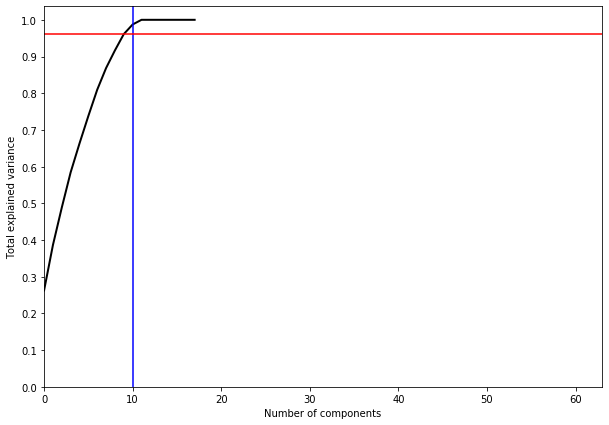

In [18]:
plt.figure(figsize=(10,7))

plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)

plt.xlabel('Number of components')
plt.ylabel('Total explained variance')

plt.xlim(0, 63)
plt.yticks(np.arange(0, 1.1, 0.1))

plt.axvline(10, c='b')
plt.axhline(0.96, c='r')

plt.show()

The conclusion from the above elbow plot ,we can conclude that 10 New PCA features will explain more than 95% of the variance

Transform the data using PCA ( select optimum number of PCs).

In [19]:
pca = PCA(n_components=10)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [20]:
print(pca.explained_variance_ratio_)

[0.26260431 0.12370029 0.10205489 0.09603516 0.07873083 0.07489249
 0.07153591 0.05897091 0.04815471 0.04440222]


In [21]:
print(pca.explained_variance_ratio_.sum())

0.9610817258753509


In [22]:
X_pca = pca.transform(X_train)

In [23]:
X_pca.shape

(200, 10)

Apply KMeans algorithm on the above transformed data. 

In [24]:
cluster_error=[]

In [25]:
from sklearn.cluster import KMeans

In [26]:
cluster_range = range( 1, 10 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters,n_init = 10, random_state=2)
  clusters.fit(X_pca)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:10]

,num_clusters,cluster_errors
0,1,751.248753
1,2,568.885980
2,3,508.502267
3,4,460.166648
4,5,428.304743
5,6,389.128679
6,7,369.838987
7,8,346.409799
8,9,338.022252


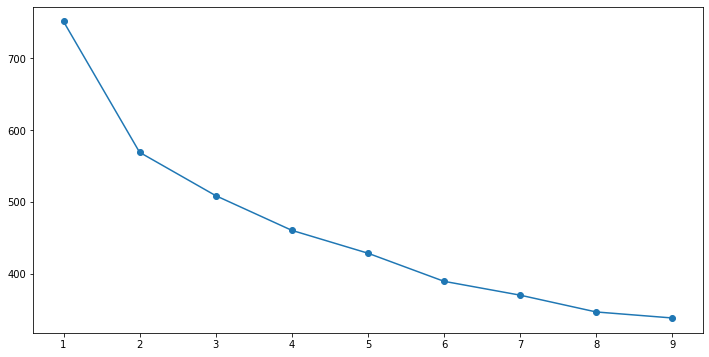

In [27]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

Select optimal number of clusters and form clusters out of the train data.

Output-->From the Above elbow Curve ,the optimal number of cluster is 2

In [29]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, n_init = 15, random_state=2)

In [30]:
kmeans.fit(X_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [31]:
X_pca=pd.DataFrame(X_pca)

In [32]:
clusters=kmeans.labels_.tolist()

In [33]:
X_pca['Clusters']=clusters

In [34]:
X_pca['Clusters'].value_counts()

0    116
1     84
Name: Clusters, dtype: int64

In [35]:
X_pca.head()

,0,1,2,3,4,5,6,7,8,9,Clusters
0,-0.475428,-0.317021,1.172458,-0.629964,0.051390,0.230182,0.487479,0.542925,0.673567,-0.782915,0
1,1.664572,-0.407014,0.038879,-0.203398,0.320904,0.112138,0.006689,-0.136662,-0.129523,-0.064009,1
2,1.348908,0.392518,0.090918,-0.079396,0.209903,0.465574,-0.199074,0.309331,0.686751,-0.494001,1
3,1.220442,-0.178329,-0.102562,0.302253,0.370610,0.977555,0.296208,-0.204164,-0.495062,0.619828,1
4,-0.248469,0.261480,-0.032124,-0.297516,-0.565208,-0.195935,0.924770,-0.213407,0.988567,-0.679173,0


Transform the test data using the same PCA object that was fit on the train data

In [36]:
X_test = pca.transform(X_test)

In [37]:
X_test=pd.DataFrame(X_test)

Use the same kmeans object, assign cluster labels to the test data and store it as a
feature.

In [39]:
kmeans=KMeans(n_clusters=2,n_init=15,random_state=2)
kmeans.fit(X_test)
Cluster_1=kmeans.labels_.tolist()

In [40]:
X_test['Cluster']=Cluster_1

Apply SVC model on train dataset and predict target for test dataset.

In [41]:
X_trainf=X_pca.drop('Clusters',axis=1)

In [42]:
from sklearn.svm import SVC

svc_model=SVC(C=0.004,kernel='linear',gamma=1)

svc_model.fit(X_trainf,y_train)

SVC(C=0.004, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [43]:
X_test1=X_test.drop('Cluster',axis=1)

In [44]:
y_predict=svc_model.predict(X_test1)

In [45]:
svc_model.score(X_trainf,y_train)

0.96

In [46]:
svc_model.score(X_test1,y_test)

0.96

Check accuracy and confusion matrix

In [47]:
from sklearn.metrics import confusion_matrix,classification_report

confusion_matrix(y_predict,y_test)

array([[22,  1],
       [ 1, 26]])

In [48]:
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           B       0.96      0.96      0.96        23
          NB       0.96      0.96      0.96        27

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50

